# DC Circuit Analysis with Dependent Sources

## Simulating Resistor, Independent voltage and current sources, dependent sources

### Circuit with Current Controlled Voltage Source

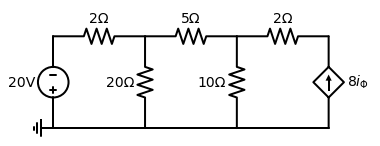

In [127]:
import schemdraw as schem
import schemdraw.elements as elm

d = schem.Drawing()

Line1 = d.add(elm.LINE, d='right')
d += elm.Line().right().length(3)
d += elm.Line().right().length(3)
d += elm.SourceControlledI().up().label(('$8i_Φ$'), loc='bottom')
d += elm.Resistor().left().label('2Ω')
d.push()
d += elm.Resistor().down().label('10Ω').toy(Line1.end)
d.pop()
d += elm.Resistor().left().label('5Ω')
d.push()
d += elm.Resistor().down().label('20Ω')
d.pop()
d += elm.Resistor().left().label('2Ω')
d += elm.SourceV().down().label('20V')
d += elm.Ground().down()
d


In [128]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

R1 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R2 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R3 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R4 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R5 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

V1 = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

H = widgets.IntSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')


box = widgets.VBox([R1])
# defining a list with the contents of our windows
children = [widgets.VBox([R1]), widgets.VBox([R2]), widgets.VBox([R3]), widgets.VBox([R4]), widgets.VBox([R5]), widgets.VBox([V1]), widgets.VBox([H])]
# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children
# changing the title of the first and second window
tab.set_title(0, 'R1')
tab.set_title(1, 'R2')
tab.set_title(2, 'R3')
tab.set_title(3, 'R4')
tab.set_title(4, 'R5')
tab.set_title(5, 'V1')
tab.set_title(6, 'H')
tab

In [87]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


In [130]:
circuit = Circuit('Circuit with Controlled Current Voltage Source')
circuit.R(1, 1, 2, R1.value@u_Ω)
circuit.R(2, 2, circuit.gnd, R2.value@u_Ω)
circuit.R(3, 2, 3,            R3.value@u_Ω)
circuit.R(4, 4, circuit.gnd, R4.value@u_Ω)
circuit.R(5, 4, 5,            R5.value@u_Ω)
circuit.V(1, 1, circuit.gnd, V1.value@u_V)
circuit.V('test', 3, 4,       0@u_V)
circuit.H(1, 5, circuit.gnd, 'Vtest', H.value)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

button_send = widgets.Button(
                description='Simulate Circuit',
                tooltip='Simulate',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        for node in analysis.nodes.values():
            print('Node {}: {:4.1f} V'.format(str(node), float(node)))
        for node in analysis.branches.values():
            print('Node {}: {:5.2f} A'.format(str(node), float(node)))

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])

vbox_result

